# Google Gen AI SDK - PT-BR

documentação: https://googleapis.github.io/python-genai/

In [ ]:
!pip install google-genai
!pip install -q -U google-generativeai

### Configure sua chave API

Antes de poder usar a API Gemini, você deve primeiro obter uma chave de API. Se ainda não tiver uma, crie uma chave com um clique no Google AI Studio.

<a class="button button-primary" href="https://aistudio.google.com" target="_blank" rel="noopener noreferrer">Obtenha uma chave de API</a>

No Colab, adicione a chave do gerenciador de segredos em “🔑” no painel esquerdo. Dê a ele o nome `GOOGLE_API_KEY`.

Depois de obter a chave da API, passe-a para o SDK. Você pode fazer isso de duas maneiras:

Coloque a chave na variável de ambiente GOOGLE_API_KEY (o SDK irá buscá-la automaticamente a partir daí).
Passe a chave para genai.configure(api_key=...)

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

Para uma saída de texto formatado, podemos utilizar essa chamada para markdown

In [ ]:
from IPython.display import display
from IPython.display import Markdown
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
import google.generativeai as genai
genai.configure(api_key=GOOGLE_API_KEY)
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/learnlm-2.0-flash-experimental
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models

In [ ]:
from google import genai
from google.genai import types
client = genai.Client(api_key=GOOGLE_API_KEY)

In [ ]:
response = client.models.generate_content(
    model='models/gemma-3-27b-it', contents='O que é DevFest?'
)
to_markdown(response.text)

> DevFest é um evento anual, global e liderado pela comunidade de desenvolvedores Google. Ele é organizado por grupos de usuários do Google (Google Developer Groups - GDGs) em diversas cidades ao redor do mundo.
> 
> **O que acontece em um DevFest?**
> 
> *   **Conteúdo técnico:** O DevFest oferece uma variedade de palestras, workshops e codelabs sobre as mais recentes tecnologias do Google, como Android, Flutter, Firebase, Google Cloud Platform, Machine Learning e outras.
> *   **Networking:** É uma ótima oportunidade para desenvolvedores se conectarem, trocarem ideias e aprenderem uns com os outros.
> *   **Comunidade:** O DevFest promove o senso de comunidade entre os desenvolvedores, incentivando a colaboração e o aprendizado mútuo.
> *   **Conteúdo para todos os níveis:** Há conteúdo para desenvolvedores de todos os níveis de experiência, desde iniciantes até especialistas.
> *   **Gratuito ou de baixo custo:** A maioria dos DevFests são gratuitos ou têm um custo muito baixo para participar.
> 
> **Quem deve participar?**
> 
> *   Desenvolvedores de software
> *   Designers
> *   Gerentes de produto
> *   Empreendedores
> *   Estudantes
> *   Qualquer pessoa interessada em tecnologia e nas ferramentas do Google
> 
> **Como encontrar um DevFest perto de você?**
> 
> Você pode encontrar informações sobre os DevFests próximos em:
> 
> *   **Site oficial do DevFest:** [https://devfest.withgoogle.com/](https://devfest.withgoogle.com/)
> *   **Página do DevFest no Google Developers:** [https://developers.google.com/events/devfest](https://developers.google.com/events/devfest)
> *   **Redes sociais:** Procure por #DevFest no Twitter, LinkedIn e outras plataformas.
> 
> Em resumo, o DevFest é um evento imperdível para quem quer se manter atualizado com as últimas tecnologias do Google e fazer parte de uma comunidade vibrante de desenvolvedores.

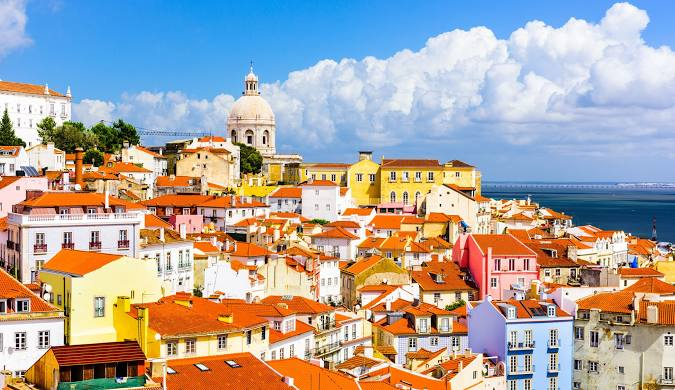

In [ ]:
import PIL.Image

img = PIL.Image.open('/content/licensed-image.jpg')
img

In [ ]:
response = client.models.generate_content(
    model='models/gemma-3-27b-it', contents=['Escreva um texto em português sobre essa imagem', img]
)
to_markdown(response.text)

> A imagem retrata uma vista deslumbrante de Lisboa, Portugal. O bairro de Alfama se estende em um labirinto de ruas estreitas e casas coloridas, com telhados de telha vermelha que se empilham em direção ao céu azul. 
> 
> Em destaque, a imponente cúpula branca da Basílica da Estrela se eleva sobre os edifícios, servindo como um ponto focal na paisagem urbana. Ao fundo, vislumbra-se o rio Tejo, com a Ponte 25 de Abril se estendendo em direção à distância.
> 
> A cena transmite uma atmosfera vibrante e histórica, capturando a beleza e o charme característicos da capital portuguesa. A combinação das cores vivas, da arquitetura tradicional e do céu azul cria uma imagem memorável e convidativa.

In [ ]:
file = client.files.upload(file='/content/astolfo.txt')
response = client.models.generate_content(
    model='models/gemma-3-27b-it',
    contents=['Resuma em português esse arquivo', file]
)
to_markdown(response.text)

> ## Resumo: Astolfo, o Mascote Lunar do DevFest BH
> 
> Astolfo é o mascote do DevFest Belo Horizonte, criado a partir de um "bug" em um hackathon que ganhou vida e uma paixão por explorar. Representando o espírito inovador da comunidade de desenvolvedores mineira, Astolfo construiu um foguete com sucata e tecnologia local para viajar à Lua.
> 
> Sua jornada simboliza a capacidade de superar limites, escalar projetos e a mentalidade de que não há barreiras para a tecnologia. Ao retornar com uma amostra lunar, Astolfo se tornou a face do DevFest BH, personificando a coragem, a engenhosidade e a busca por avanços que vão além do convencional.
> 
> Em resumo, Astolfo é uma metáfora para o DevFest: a tecnologia como ferramenta para alcançar o impossível e a prova de que, com conhecimento e comunidade, qualquer ideia pode ir "à estratosfera... e além".
